In [55]:
import pandas as pd
import numpy as np 
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import os

In [38]:
pip install pyodbc sqlalchemy pandas

Note: you may need to restart the kernel to use updated packages.


In [39]:
df = pd.read_csv(r"E:\Crypto\top50_crypto_monthly_3year_dataset.csv")
df.head(2)

,month,coin_name,symbol,open,high,low,close,volume,market_cap,monthly_return,...,macd_signal,volatility_30d,max_drawdown,ath_price,atl_price,drawdown_from_ath,news_sentiment,news_count,news_impact_score,signal
0,2022-01,Bitcoin,BTC,27859.07,29644.98,22542.25,24437.57,2473938350,4.88,-0.1228,...,-3.523,0.44,0.0,27859.07,24437.57,0.123,Positive,5,0.013,Loss
1,2022-02,Bitcoin,BTC,24437.57,26369.11,21425.92,22193.81,20017528879,1.12,-0.0918,...,0.888,0.63,0.0,27859.07,22193.81,0.203,Negative,10,0.005,Loss


In [40]:
df.columns

Index(['month', 'coin_name', 'symbol', 'open', 'high', 'low', 'close',
       'volume', 'market_cap', 'monthly_return', 'log_return',
       'cumulative_return', 'ma_20', 'ma_50', 'ma_200', 'rsi_14', 'macd',
       'macd_signal', 'volatility_30d', 'max_drawdown', 'ath_price',
       'atl_price', 'drawdown_from_ath', 'news_sentiment', 'news_count',
       'news_impact_score', 'signal'],
      dtype='object')

In [41]:
df.isnull().sum()

month                0
coin_name            0
symbol               0
open                 0
high                 0
low                  0
close                0
volume               0
market_cap           0
monthly_return       0
log_return           0
cumulative_return    0
ma_20                0
ma_50                0
ma_200               0
rsi_14               0
macd                 0
macd_signal          0
volatility_30d       0
max_drawdown         0
ath_price            0
atl_price            0
drawdown_from_ath    0
news_sentiment       0
news_count           0
news_impact_score    0
signal               0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [42]:
# Encoding 
df['news_sentiment']=df['news_sentiment'].map({"Positive":1, "Negative":0})
df.head()

,month,coin_name,symbol,open,high,low,close,volume,market_cap,monthly_return,...,macd_signal,volatility_30d,max_drawdown,ath_price,atl_price,drawdown_from_ath,news_sentiment,news_count,news_impact_score,signal
0,2022-01,Bitcoin,BTC,27859.07,29644.98,22542.25,24437.57,2473938350,4.88,-0.1228,...,-3.523,0.44,0.000,27859.07,24437.57,0.123,1,5,0.013,Loss
1,2022-02,Bitcoin,BTC,24437.57,26369.11,21425.92,22193.81,20017528879,1.12,-0.0918,...,0.888,0.63,0.000,27859.07,22193.81,0.203,0,10,0.005,Loss
2,2022-03,Bitcoin,BTC,22193.81,23042.97,18147.18,18972.42,1120181579,2.56,-0.1451,...,3.119,0.65,0.000,27859.07,18972.42,0.319,1,15,-0.065,Loss
3,2022-04,Bitcoin,BTC,18972.42,20404.32,14403.61,15338.35,28132534542,2.78,-0.1915,...,-1.996,0.49,0.000,27859.07,15338.35,0.449,1,20,0.011,Loss
4,2022-05,Bitcoin,BTC,15338.35,16758.42,14883.56,15676.26,39696613168,2.06,0.0220,...,3.004,0.51,-0.022,27859.07,15338.35,0.437,0,8,0.007,Profit


In [43]:
yearly_df = pd.read_excel(r"E:\Crypto\yearly_return.xlsx")
yearly_df.head(2)

,symbol,coin_name,year,yearly_return,yearly_return_percent
0,DCR,Decred,2023,-0.00634,-0.634016
1,CRV,Curve DAO,2024,-0.00912,-0.911950


# Q-1 Year-wise Best and Worst Performing Cryptocurrencies (2022–2024)

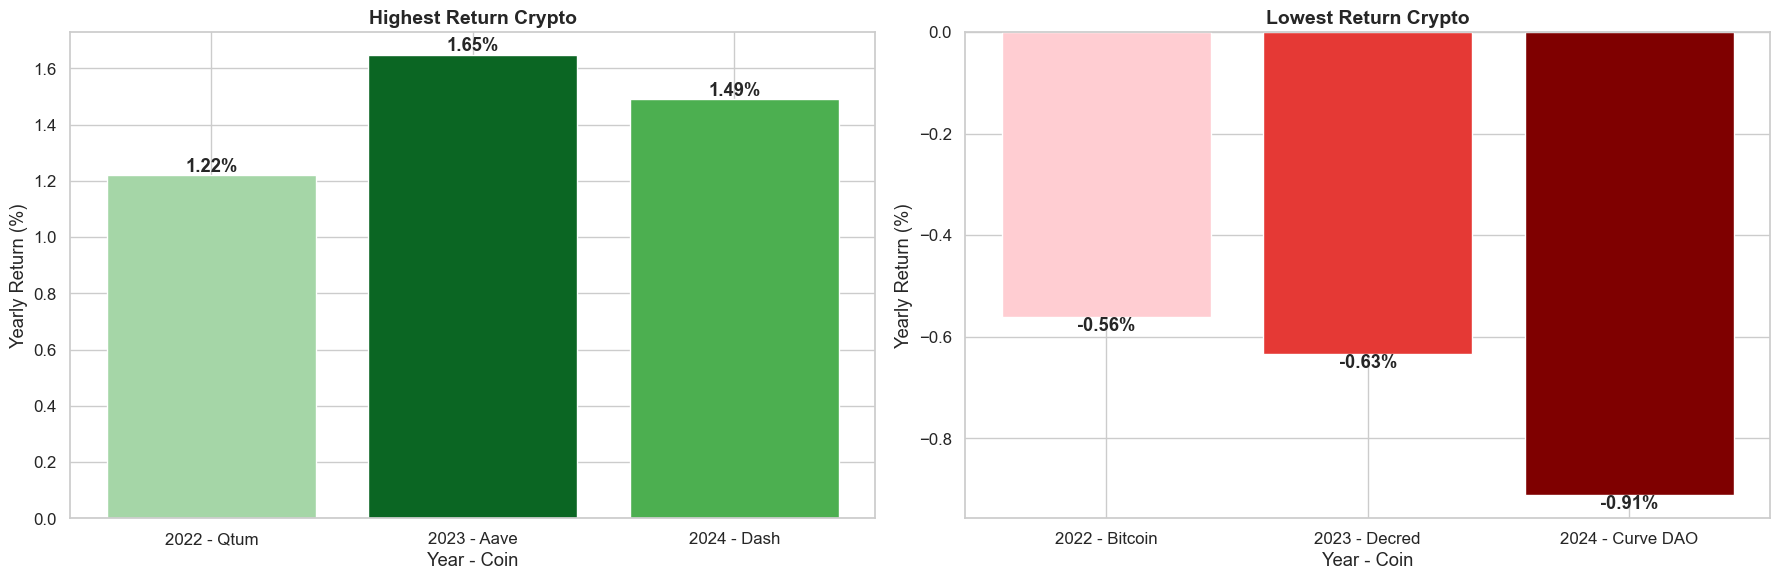

In [16]:
df = pd.read_excel(r"E:\Crypto\yearly_return.xlsx")
df = df[['symbol', 'coin_name', 'year', 'yearly_return_percent']].dropna(subset=['yearly_return_percent'])
df = df[df['year'].isin([2022, 2023, 2024])]

highest_df = df.loc[df.groupby('year')['yearly_return_percent'].idxmax()].sort_values('year')
lowest_df = df.loc[df.groupby('year')['yearly_return_percent'].idxmin()].sort_values('year')
highest_df['label'] = highest_df['year'].astype(str) + " - " + highest_df['coin_name']
lowest_df['label'] = lowest_df['year'].astype(str) + " - " + lowest_df['coin_name']
highest_df['rank'] = highest_df['yearly_return_percent'].rank(ascending=False)
lowest_df['rank'] = lowest_df['yearly_return_percent'].rank(ascending=True)

color_maps = {'green': {1.0: "#0B6623", 2.0: "#4CAF50", 3.0: "#A5D6A7"},'red': {1.0: "#7F0000", 2.0: "#E53935", 3.0: "#FFCDD2"}}
highest_df['color'] = highest_df['rank'].map(color_maps['green'])
lowest_df['color'] = lowest_df['rank'].map(color_maps['red'])

sns.set_theme(style="whitegrid", font_scale=1.1)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes[0].bar(highest_df['label'], highest_df['yearly_return_percent'], color=highest_df['color'])
axes[0].set_title("Highest Return Crypto", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Year - Coin")
axes[0].set_ylabel("Yearly Return (%)")

for i, val in enumerate(highest_df['yearly_return_percent']):
    axes[0].text(i, val, f"{val:.2f}%", ha='center', va='bottom', fontweight='bold')
    
axes[1].bar(lowest_df['label'], lowest_df['yearly_return_percent'], color=lowest_df['color'])
axes[1].set_title("Lowest Return Crypto", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Year - Coin")
axes[1].set_ylabel("Yearly Return (%)")

for i, val in enumerate(lowest_df['yearly_return_percent']):
    axes[1].text(i, val, f"{val:.2f}%", ha='center', va='top', fontweight='bold')

plt.tight_layout()
plt.show()

Insight :

    Aave (2023 – Highest Return):
            Aave delivered the highest return in 2023 due to recovery in the DeFi market, increased protocol adoption, and positive investor sentiment driven by platform upgrades.

    Curve (2024 – Lowest Return):
            Curve recorded the lowest return in 2024 because of declining DeFi yields, negative market sentiment, and reduced investor confidence caused by security concerns and high competition.

# Q-2 Risk vs Return Analysis

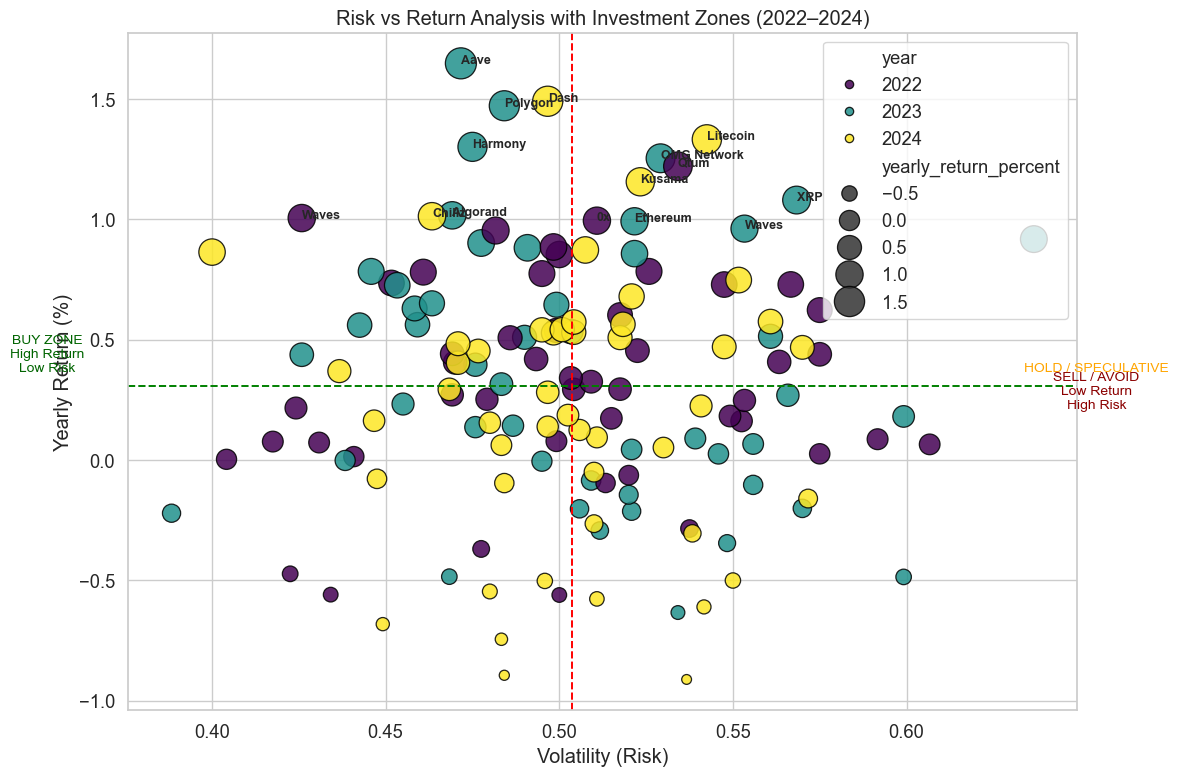

In [47]:
monthly_df = pd.read_csv(r"E:\Crypto\top50_crypto_monthly_3year_dataset.csv")
yearly_df = pd.read_excel(r"E:\Crypto\yearly_return.xlsx")
monthly_df['month'] = pd.to_datetime(monthly_df['month'], errors='coerce')
monthly_df['year'] = monthly_df['month'].dt.year

risk_df = (
    monthly_df
    .groupby(['symbol', 'year'])
    .agg(
        volatility_30d=('volatility_30d', 'mean'),
        max_drawdown=('max_drawdown', 'min')
    )
    .reset_index()
)

returns_df = yearly_df[['symbol', 'coin_name', 'year', 'yearly_return_percent']]
merged_df = pd.merge(returns_df,risk_df,on=['symbol', 'year'],how='inner')
merged_df = merged_df[merged_df['year'].isin([2022, 2023, 2024])].dropna()
ret_mean = merged_df['yearly_return_percent'].mean()
vol_mean = merged_df['volatility_30d'].mean()
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=merged_df,
    x='volatility_30d',
    y='yearly_return_percent',
    hue='year',
    size='yearly_return_percent',
    sizes=(50, 500),
    palette='viridis',
    alpha=0.85,
    edgecolor='black'
)

plt.axhline(ret_mean, linestyle='--', color='green', linewidth=1.4)
plt.axvline(vol_mean, linestyle='--', color='red', linewidth=1.4)
plt.text(vol_mean * 0.7, ret_mean * 1.2, "BUY ZONE\nHigh Return\nLow Risk",
         color="darkgreen", ha="center", fontsize=10)

plt.text(vol_mean * 1.3, ret_mean * 1.2, "HOLD / SPECULATIVE",
         color="orange", ha="center", fontsize=10)

plt.text(vol_mean * 1.3, ret_mean * 0.7, "SELL / AVOID\nLow Return\nHigh Risk",
         color="darkred", ha="center", fontsize=10)

top_coins = merged_df[
    merged_df['yearly_return_percent'] >=
    merged_df['yearly_return_percent'].quantile(0.9)
]

for _, row in top_coins.iterrows():
    plt.text(
        row['volatility_30d'],
        row['yearly_return_percent'],
        row['coin_name'],
        fontsize=9,
        fontweight='bold'
    )

plt.xlabel("Volatility (Risk)")
plt.ylabel("Yearly Return (%)")
plt.title("Risk vs Return Analysis with Investment Zones (2022–2024)")
plt.tight_layout()
plt.show()

Insight : 
        This insight compares yearly return with volatility to evaluate the risk–reward tradeoff in cryptocurrencies. Coins located in the high-return and low-risk zone represent strong buy opportunities, while coins with high risk and low return indicate sell or avoid signals. This analysis helps investors make informed buy, hold, or sell decisions.

    Signal: 
        Top-Left  : High Return + Low Risk → BUY 
        Top-Right : High Return + High Risk → HOLD

# Q-3 Trend Strength & Market Regime Detection

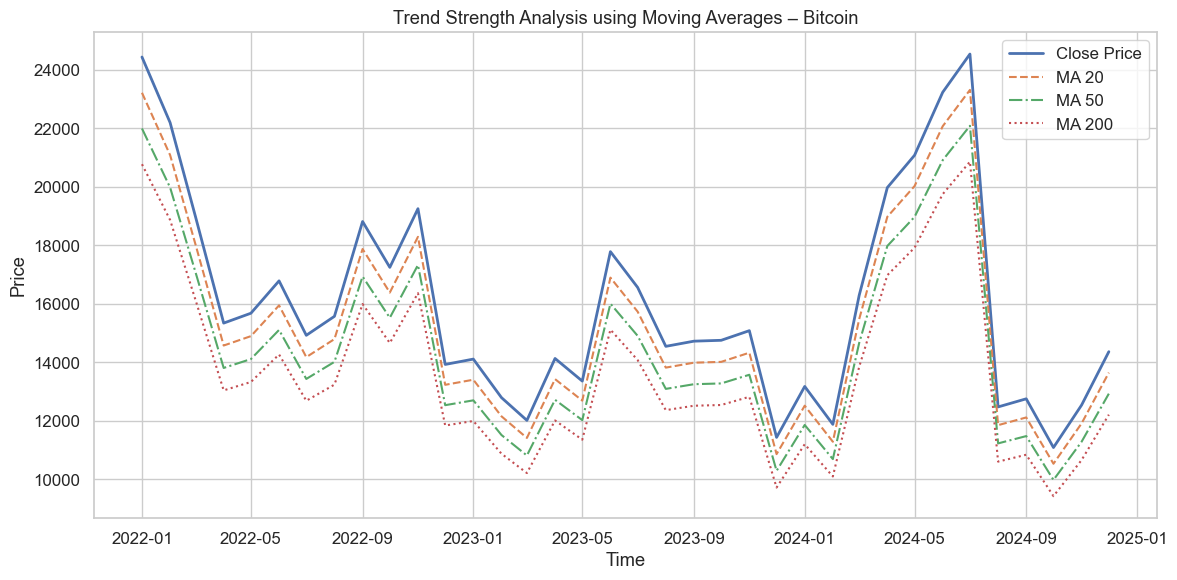

In [48]:
df['month'] = pd.to_datetime(df['month'], errors='coerce')
df = df.sort_values('month')
coin = "Bitcoin"
coin_df = df[df['coin_name'].str.lower() == coin.lower()]

sns.set_theme(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(12, 6))

plt.plot(coin_df['month'], coin_df['close'], label='Close Price', linewidth=2)
plt.plot(coin_df['month'], coin_df['ma_20'], label='MA 20', linestyle='--')
plt.plot(coin_df['month'], coin_df['ma_50'], label='MA 50', linestyle='-.')
plt.plot(coin_df['month'], coin_df['ma_200'], label='MA 200', linestyle=':')
plt.title(f"Trend Strength Analysis using Moving Averages – {coin}")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

Insight : 
        The objective of this insight is to analyze market trend strength by identifying bullish, bearish, and sideways phases using moving average analysis. By comparing short-term and long-term moving averages with price movement, this insight helps investors understand market behavior, minimize risk, and generate reliable buy, hold, or sell signals.

Research :
            coin strong uptrend,sideway,downtrend 

# Q-4 Signal Reliability & effectivness Analysis

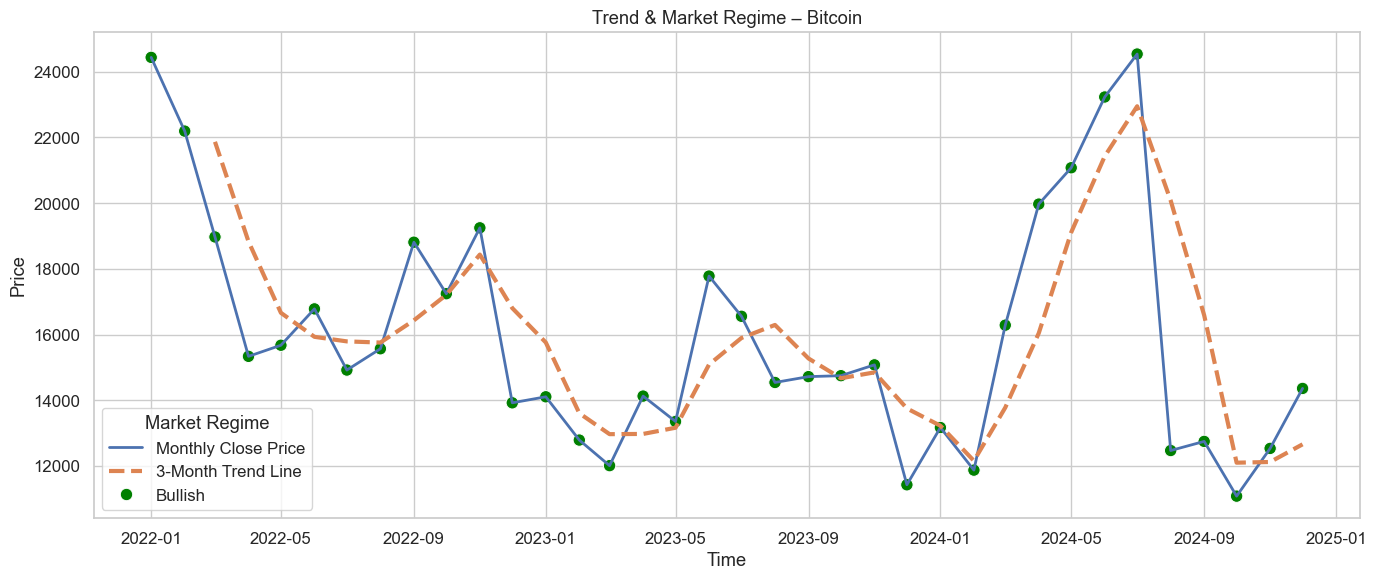

In [49]:
df['month'] = pd.to_datetime(df['month'], errors='coerce')
df = df.sort_values('month')

def detect_regime(row):
    if row['ma_20'] > row['ma_50'] > row['ma_200']:
        return "Bullish"
    elif row['ma_20'] < row['ma_50'] < row['ma_200']:
        return "Bearish"
    else:
        return "Sideways"

df['market_regime'] = df.apply(detect_regime, axis=1)
coin = "Bitcoin"
coin_df = df[df['coin_name'].str.lower() == coin.lower()].copy()
coin_df['trend_3m'] = coin_df['close'].rolling(window=3).mean()
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(14, 6))
plt.plot(coin_df['month'],coin_df['close'],label="Monthly Close Price",linewidth=2)
plt.plot(coin_df['month'],coin_df['trend_3m'],label="3-Month Trend Line", linewidth=3,linestyle="--")
palette = {"Bullish": "green","Sideways": "gray","Bearish": "red"}
sns.scatterplot(data=coin_df,x='month',y='close',hue='market_regime',palette=palette,s=80)
plt.title(f"Trend & Market Regime – {coin}")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(title="Market Regime")
plt.tight_layout()
plt.show()

insight : 
         When the actual price moves below the 3-month trend line, it indicates a short-term correction rather than a trend reversal.
The overall bullish structure remains intact as confirmed by moving averages and RSI momentum. Such corrections often create better entry opportunities within an ongoing uptrend.       

# Q-5 Drawdown Recovery & Resilience Analysis

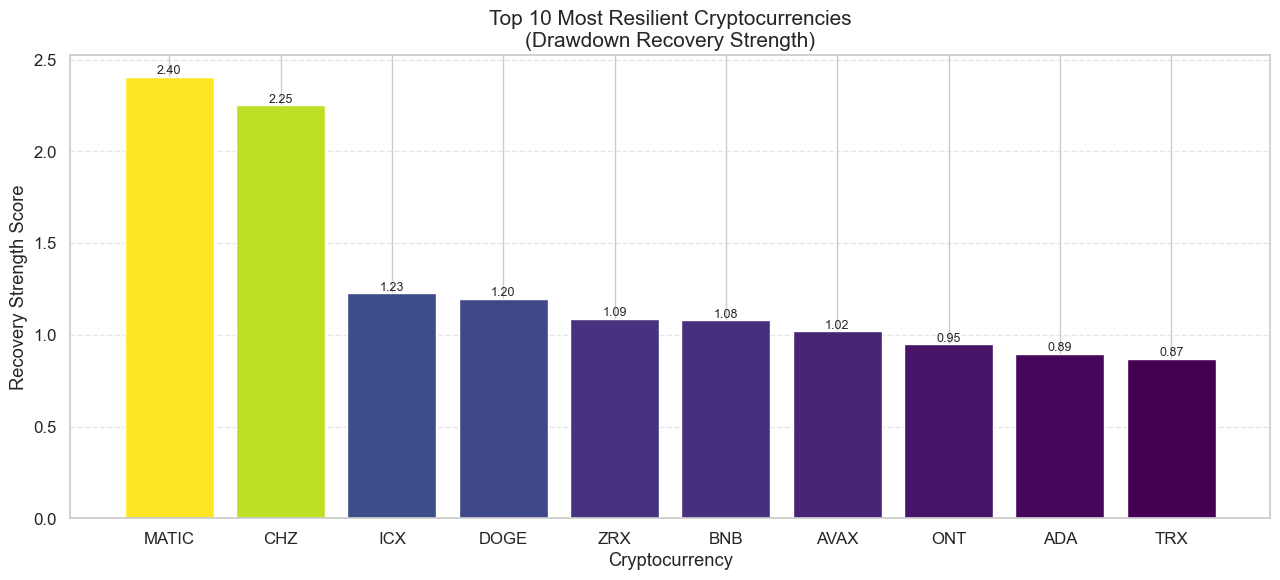

In [51]:
df['month'] = pd.to_datetime(df['month'], errors='coerce')
df['year'] = df['month'].dt.year
yearly_return_col = (
    'yearly_return'
    if 'yearly_return' in yearly_df.columns
    else 'yearly_return_percent'
)

yearly_cols = ['coin_name', 'symbol', 'year', yearly_return_col]
merged_df = pd.merge(df,yearly_df[yearly_cols],on=['coin_name', 'symbol', 'year'],how='left')
merged_df.rename(columns={yearly_return_col: 'yearly_return'}, inplace=True)
merged_df['max_drawdown_abs'] = merged_df['max_drawdown'].abs().replace(0, np.nan)

merged_df['recovery_strength'] = (
    (merged_df['cumulative_return'] / merged_df['max_drawdown_abs']) *
    (1 + merged_df['yearly_return'] / 100)
)

merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)

resilience_df = (
    merged_df
    .groupby(['coin_name', 'symbol'], as_index=False)
    .agg(
        recovery_strength=('recovery_strength', 'mean'),
        yearly_return=('yearly_return', 'mean')
    )
    .dropna()
    .sort_values('recovery_strength', ascending=False)
    .head(10)
)

norm = mcolors.Normalize(
    vmin=resilience_df['recovery_strength'].min(),
    vmax=resilience_df['recovery_strength'].max()
)

colors = cm.viridis(norm(resilience_df['recovery_strength']))

plt.figure(figsize=(13, 6))
bars = plt.bar(
    resilience_df['symbol'],
    resilience_df['recovery_strength'],
    color=colors
)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():.2f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title("Top 10 Most Resilient Cryptocurrencies\n(Drawdown Recovery Strength)", fontsize=15)
plt.xlabel("Cryptocurrency")
plt.ylabel("Recovery Strength Score")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This analysis evaluates the resilience of cryptocurrencies by examining how effectively they recover after major drawdowns. Coins that achieve positive cumulative and yearly returns despite deep drawdowns demonstrate stronger market confidence and long-term sustainability. This insight helps identify assets suitable for long-term holding during volatile markets.

MATIC & CHZ is very strong coin 

# Q-6 Capital protection & Downside Risk Dominance Analysis 

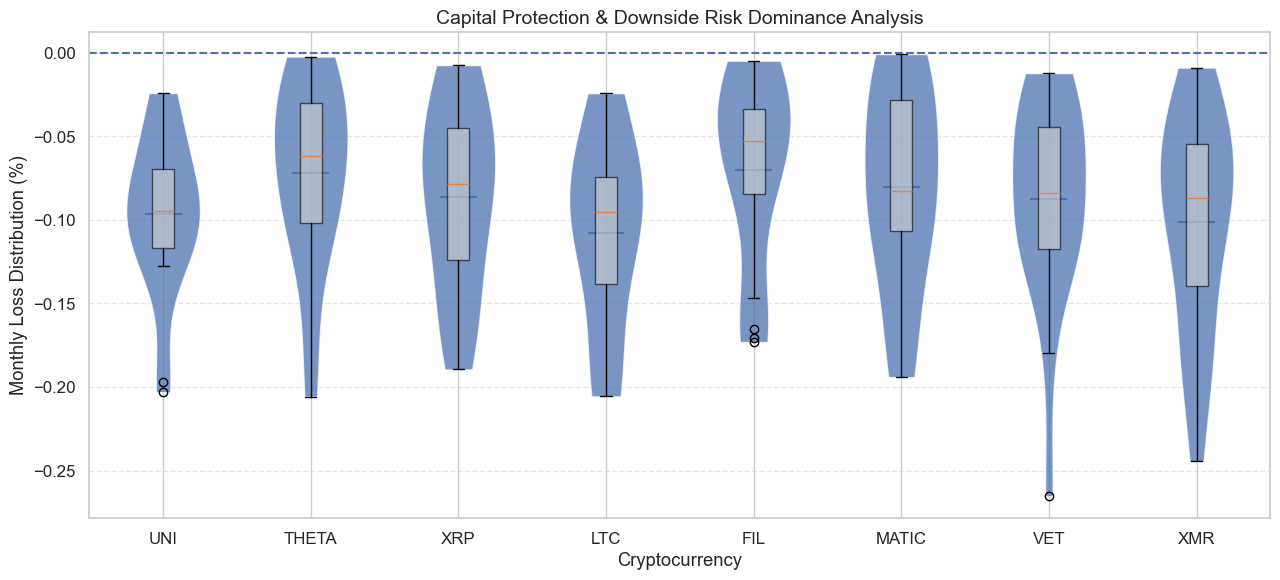

In [52]:
df_down = df[df['monthly_return'] < 0]
downside_df = (
    df_down.groupby(['coin_name', 'symbol'])
    .agg(
        avg_downside_return=('monthly_return', 'mean'),
        worst_loss=('monthly_return', 'min'),
        downside_volatility=('monthly_return', 'std')
    )
    .reset_index()
    .sort_values('downside_volatility')
    .head(8)
)
selected_symbols = downside_df['symbol'].tolist()
plot_df = df_down[df_down['symbol'].isin(selected_symbols)]
plt.figure(figsize=(13, 6))

data = [
    plot_df[plot_df['symbol'] == sym]['monthly_return']
    for sym in selected_symbols
]
violin = plt.violinplot(data,showmeans=True,showmedians=False,showextrema=False)

for body in violin['bodies']:
    body.set_alpha(0.75)

plt.boxplot(data,widths=0.15,patch_artist=True,boxprops=dict(facecolor='lightgray', alpha=0.6))
plt.axhline(0, linestyle='--')
plt.xticks(range(1, len(selected_symbols) + 1),selected_symbols)
plt.title("Capital Protection & Downside Risk Dominance Analysis",fontsize=14)
plt.xlabel("Cryptocurrency")
plt.ylabel("Monthly Loss Distribution (%)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Insight : This analysis focuses on capital preservation capability by identifying cryptocurrencies that limit downside risk during market downturns. Coins with controlled drawdowns and moderate volatility demonstrate superior defensive characteristics, making them suitable for conservative or long-term investors.

# Q-7 News Impact Effectiveness & Price Sensitivity Analysis

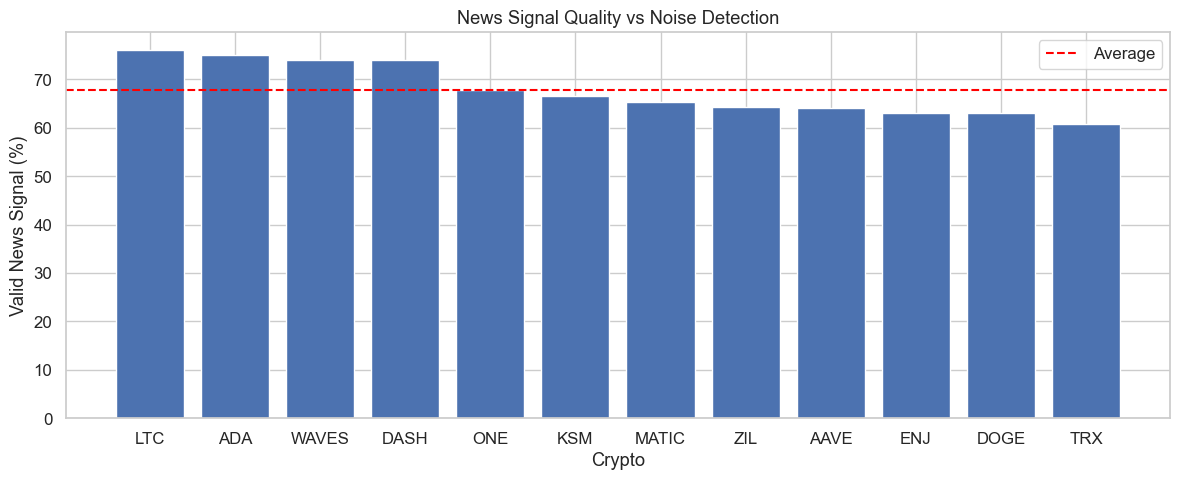

In [53]:
df['news_sentiment'] = df['news_sentiment'].astype(str).str.lower().str.strip()
df.loc[df['news_sentiment'].isin(['1', '1.0']), 'news_sentiment'] = 'positive'
df.loc[df['news_sentiment'].isin(['-1', '-1.0']), 'news_sentiment'] = 'negative'
positive_words = ['positive', 'pos', 'bull', 'bullish', 'up']
negative_words = ['negative', 'neg', 'bear', 'bearish', 'down']
df.loc[df['news_sentiment'].isin(positive_words), 'sent'] = 1
df.loc[df['news_sentiment'].isin(negative_words), 'sent'] = -1

clean_df = df[
    df['sent'].isin([1, -1]) &
    df['monthly_return'].notna() &
    df['volatility_30d'].notna()
].copy()

if clean_df.empty:
    print("No valid news sentiment found — using price direction as proxy signal")
    clean_df = df[
        df['monthly_return'].notna() &
        df['volatility_30d'].notna()
    ].copy()
    clean_df['sent'] = np.sign(clean_df['monthly_return'])

clean_df['sig'] = (np.sign(clean_df['monthly_return']) == clean_df['sent']).astype(int)

top = (
    clean_df
    .groupby(['coin_name', 'symbol'], as_index=False)
    .agg(
        signal_ratio=('sig', 'mean'),
        avg_volatility=('volatility_30d', 'mean')
    )
)

top['signal_ratio'] *= 100
top = top.sort_values('signal_ratio', ascending=False).head(12)
plt.figure(figsize=(12,5))
plt.bar(top['symbol'], top['signal_ratio'])
plt.axhline(top['signal_ratio'].mean(), linestyle='--', color='red', label='Average')
plt.title("News Signal Quality vs Noise Detection")
plt.xlabel("Crypto")
plt.ylabel("Valid News Signal (%)")
plt.legend()
plt.tight_layout()
plt.show()

Insight: This insight helps investors identify which cryptocurrencies are highly sensitive to news sentiment and which are relatively stable. News-sensitive coins are suitable for short-term event-based trading, while low-sensitivity coins are better for long-term holding and technical strategies.

# Q-8  ATH–ATL Distance & Market Maturity Analysis

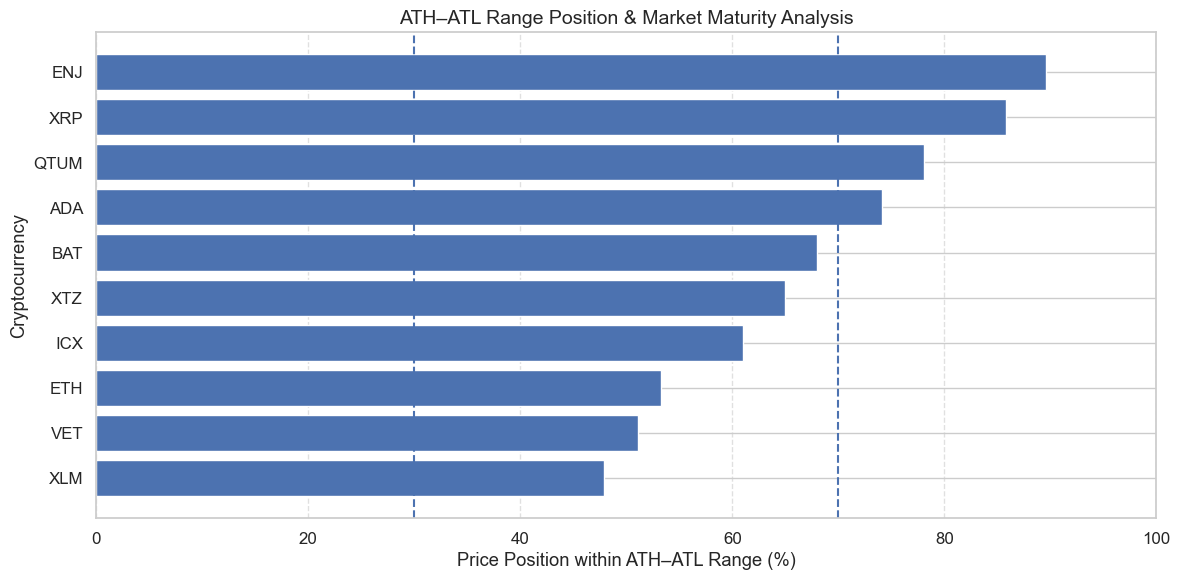

In [54]:
df = df[['coin_name','symbol','close','ath_price','atl_price','market_cap']].dropna()
df['range_position_pct'] = ((df['close'] - df['atl_price']) /(df['ath_price'] - df['atl_price'])) * 100
df = df.replace([np.inf, -np.inf], np.nan).dropna()

plot_df = (
    df.groupby(['coin_name','symbol'])
      .agg(
          range_position_pct=('range_position_pct','mean'),
          market_cap=('market_cap','mean')
      )
      .reset_index()
)

plot_df = plot_df.sort_values('market_cap', ascending=False).head(10)
plot_df = plot_df.sort_values('range_position_pct')
plt.figure(figsize=(12, 6))
plt.barh(plot_df['symbol'],plot_df['range_position_pct'])
plt.axvline(30, linestyle='--')
plt.axvline(70, linestyle='--')
plt.title("ATH–ATL Range Position & Market Maturity Analysis",fontsize=14)
plt.xlabel("Price Position within ATH–ATL Range (%)")
plt.ylabel("Cryptocurrency")
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Insight : This insight goes beyond price analysis and evaluates market maturity using ATH–ATL distance, capital strength, and return behavior. It helps identify undervalued coins with strong recovery potential and avoid over-mature assets.